<a href="https://colab.research.google.com/github/iceteahh/ML-FinalProject/blob/master/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [392]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Rea Data

In [0]:
data = pd.read_csv('gdrive/My Drive/MachineLearning/FinalProject/elt_price_lead_4300.csv')

In [394]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4387 entries, 0 to 4386
Data columns (total 22 columns):
ad_id              4387 non-null int64
list_id            4387 non-null int64
subject            4387 non-null object
body               4373 non-null object
orig_list_time     4387 non-null object
price              4386 non-null float64
mobile_model       4387 non-null int64
region_v2          4376 non-null float64
area               4387 non-null int64
area_v2            4376 non-null float64
condition_ad       3270 non-null float64
elt_condition      4386 non-null float64
mobile_capacity    4310 non-null float64
mobile_color       4387 non-null int64
mobile_type        4387 non-null int64
elt_warranty       1196 non-null float64
ward               3315 non-null float64
mobile_brand       4387 non-null int64
giveaway           1360 non-null float64
elt_lock           63 non-null float64
listing_adviews    4375 non-null float64
listing_leads      4375 non-null float64
dtypes: fl

In [395]:
data.head()

,ad_id,list_id,subject,body,orig_list_time,price,mobile_model,region_v2,area,area_v2,...,mobile_capacity,mobile_color,mobile_type,elt_warranty,ward,mobile_brand,giveaway,elt_lock,listing_adviews,listing_leads
0,72361917,48884773,Oppo F1s giao lưu đt 2 sim cao hơn bù tiền,Cần giao lưu oppo F1s chính hãng hết bảo hành ...,2018-08-01 12:11:32,2200000.0,118,13000.0,102,13102.0,...,4.0,7,1,NaN,NaN,11,0.0,NaN,59.0,25.0
1,72375233,48894232,Nokia 8 Bh 3/2019 ( Fix tẹt ga trong hôm nay),Em cần bán e nokia 8 máy đẹp và chính hãng nhé...,2018-08-01 15:58:55,6000000.0,113,13000.0,112,13112.0,...,5.0,6,1,NaN,NaN,10,NaN,NaN,33.0,4.0
2,72385652,48902681,Iphone 7 plus,máy quốc tế nhé. zin từ trong ra ngoài . Bao ...,2018-08-01 20:55:39,9600000.0,12,13000.0,113,13113.0,...,4.0,7,1,NaN,NaN,1,0.0,NaN,190.0,14.0
3,72395136,48909454,iphong 6s 64gb qtế zin 98% có giao lưu,dư sài cần bán hoạc giao lưu iphone 6s 64gb bả...,2018-08-02 09:01:37,5150000.0,9,13000.0,117,13117.0,...,5.0,3,1,NaN,NaN,1,NaN,NaN,36.0,0.0
4,72410071,48920286,Xiaomi redmi s2 máy đẹp như mới bảo hành lâu,Máy đẹp như mới. Nguyên hộp còn bảo hành lâu,2018-08-02 13:02:27,3000000.0,160,13000.0,97,13097.0,...,4.0,4,1,2.0,NaN,15,0.0,NaN,42.0,1.0


In [396]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4387 entries, 0 to 4386
Data columns (total 22 columns):
ad_id              4387 non-null int64
list_id            4387 non-null int64
subject            4387 non-null object
body               4373 non-null object
orig_list_time     4387 non-null object
price              4386 non-null float64
mobile_model       4387 non-null int64
region_v2          4376 non-null float64
area               4387 non-null int64
area_v2            4376 non-null float64
condition_ad       3270 non-null float64
elt_condition      4386 non-null float64
mobile_capacity    4310 non-null float64
mobile_color       4387 non-null int64
mobile_type        4387 non-null int64
elt_warranty       1196 non-null float64
ward               3315 non-null float64
mobile_brand       4387 non-null int64
giveaway           1360 non-null float64
elt_lock           63 non-null float64
listing_adviews    4375 non-null float64
listing_leads      4375 non-null float64
dtypes: fl

# Reshape Data

In [0]:
data = data[data['region_v2'] == 13000]
data = data.drop(columns=['ad_id', 'list_id', 'listing_leads', 'body', 'region_v2', 'area_v2', 'ward', 'elt_condition', 'mobile_color', 'mobile_type', 'elt_warranty', 'elt_lock', 'mobile_brand'])

**Handle datetime**

https://www.researchgate.net/post/How_to_append_TF-IDF_vector_into_pandas_dataframe

In [0]:
data['orig_list_time'] = pd.to_datetime(data['orig_list_time'], errors='coerce')
data['day_of_week'] = data['orig_list_time'].dt.dayofweek
data['hour'] = data['orig_list_time'].dt.hour
data = data.drop(columns=['orig_list_time'])

In [399]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4375 entries, 0 to 4386
Data columns (total 10 columns):
subject            4375 non-null object
price              4374 non-null float64
mobile_model       4375 non-null int64
area               4375 non-null int64
condition_ad       3258 non-null float64
mobile_capacity    4298 non-null float64
giveaway           1357 non-null float64
listing_adviews    4363 non-null float64
day_of_week        4375 non-null int64
hour               4375 non-null int64
dtypes: float64(5), int64(4), object(1)
memory usage: 376.0+ KB


**Handle NAN**

In [400]:
data.isna().any()

subject            False
price               True
mobile_model       False
area               False
condition_ad        True
mobile_capacity     True
giveaway            True
listing_adviews     True
day_of_week        False
hour               False
dtype: bool

In [0]:
data = data.drop(columns=['giveaway'])
data['price'] = data['price'].fillna(0)
data['mobile_model'] = data['mobile_model'].fillna(0)
data['condition_ad'] = data['condition_ad'].fillna(0)
data['listing_adviews'] = data['listing_adviews'].fillna(0)
data['mobile_capacity'] = data['mobile_capacity'].fillna(0)
data['subject'] = data['subject'].fillna('')

In [402]:
data.isna().any()

subject            False
price              False
mobile_model       False
area               False
condition_ad       False
mobile_capacity    False
listing_adviews    False
day_of_week        False
hour               False
dtype: bool

In [403]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4375 entries, 0 to 4386
Data columns (total 9 columns):
subject            4375 non-null object
price              4375 non-null float64
mobile_model       4375 non-null int64
area               4375 non-null int64
condition_ad       4375 non-null float64
mobile_capacity    4375 non-null float64
listing_adviews    4375 non-null float64
day_of_week        4375 non-null int64
hour               4375 non-null int64
dtypes: float64(4), int64(4), object(1)
memory usage: 341.8+ KB


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


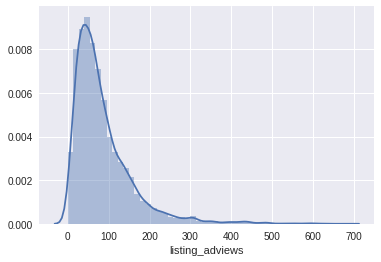

In [404]:
sns.distplot(data['listing_adviews'])

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


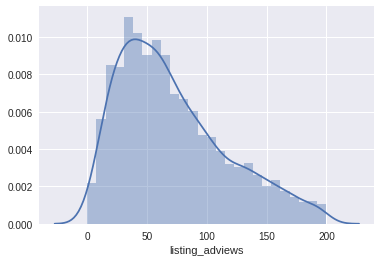

In [405]:
sns.distplot(data['listing_adviews'][data['listing_adviews'] <= 200])

In [406]:
data['price'].max()

143000000.0

In [0]:
def f(row):
  adviews = row['listing_adviews']
  if(adviews <= 75):
    return 0
  elif(adviews > 57 and adviews <=150):
    return 1
  elif(adviews >150):
    return 2

data['labeled'] = data.apply(f, axis=1)

In [0]:
data = data.drop(columns=['listing_adviews'])

In [0]:
data_final = pd.get_dummies(data, columns=['day_of_week', 'hour', 'mobile_model', 'condition_ad', 'mobile_capacity', 'area'])

In [410]:
data_final.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4375 entries, 0 to 4386
Data columns (total 353 columns):
subject                object
price                  float64
labeled                int64
day_of_week_0          uint8
day_of_week_1          uint8
day_of_week_2          uint8
day_of_week_3          uint8
day_of_week_4          uint8
day_of_week_5          uint8
day_of_week_6          uint8
hour_0                 uint8
hour_1                 uint8
hour_2                 uint8
hour_3                 uint8
hour_4                 uint8
hour_5                 uint8
hour_6                 uint8
hour_7                 uint8
hour_8                 uint8
hour_9                 uint8
hour_10                uint8
hour_11                uint8
hour_12                uint8
hour_13                uint8
hour_14                uint8
hour_15                uint8
hour_16                uint8
hour_17                uint8
hour_18                uint8
hour_19                uint8
hour_20            

In [411]:
data[data['mobile_model'] == 213].shape

(162, 9)

# Prepare For Trainging

**Prepare Train Test Dataset**

In [0]:
#data = data_final.drop(columns=['subject'])
pos = data_final.columns.get_loc('labeled')
y = data_final['labeled']
X = data_final.iloc[:, :pos].join(data_final.iloc[:, pos + 1:])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [413]:
X_train.head()

,subject,price,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,hour_0,...,area_109,area_110,area_111,area_112,area_113,area_114,area_115,area_116,area_117,area_118
825,Sony Xperia Z5 Zin Mới 99% Chống Nước,2750000.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1597,Samsung Galaxy J7 Plus 64 GB Đen,3600000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2995,TP Link Neffos C5 max cấu hình ngon giá tốt,850000.0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3696,Samsung Galaxy S9 Plus Xanh dương 64 GB,18000000.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3030,Iphone 7 Plus 128G Red Quốc Tế Mới 99%,10800000.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Clean up Text data**

In [0]:
from urllib.request import urlopen
response = urlopen('https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords.txt')
stopwords = response.read()
stopwords = stopwords.decode('utf8').split('\n')

In [0]:
import re
from bs4 import BeautifulSoup

def clean_up_text(raw_text):
  # 1. Remove HTML
  raw_text = BeautifulSoup(raw_text).get_text()
  # 2. Remove all speccial character only keep %
  letters_only = re.sub("([^a-z0-9A-Z À-ỹ%])", " ", raw_text)
  #letters_only = re.sub("\w*\d\w*", "", letters_only)
  # 3. Remove % if it doesn't stand right after a number.
  # 4. Convert to lower case and split into individual words
  words = letters_only.lower().split()
  # 5. Remove stop words
  meanful_words = [w for w in words if w not in stopwords]
  # 6. Join the words back into one string separated by space and return the 
  # result
  return (" ").join(meanful_words)

In [0]:
clean_train_subjects = []
for text in X_train['subject']:
  clean_train_subjects.append(clean_up_text(text))
X_train = X_train.drop(columns=['subject'])

In [0]:
clean_test_subjects = []
for text in X_test['subject']:
  clean_test_subjects.append(clean_up_text(text))
X_test = X_test.drop(columns=['subject'])

**Craete Features from TFIDF**

In [0]:
tfidf = TfidfVectorizer(stop_words=None,
                        tokenizer=None,
                        preprocessor=None, 
                        analyzer = 'word',
                        max_features = 5000)

In [0]:
train_data_features = tfidf.fit_transform(clean_train_subjects)

In [0]:
test_data_features = tfidf.transform(clean_test_subjects)

In [0]:
X_train = np.append(X_train.values, train_data_features.toarray(), axis=1)

In [0]:
X_test = np.append(X_test.values, test_data_features.toarray(), axis=1)

# Trainging

In [423]:
#clf = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
#clf.fit(X_train, y_train)
forest = RandomForestClassifier(n_estimators = 200) 
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [424]:
X_train.shape

(3062, 2114)

In [0]:
#predictions = clf.predict(X_test)
predictions = forest.predict(X_test)

In [426]:
accuracy_score(y_test, predictions)

0.6191926884996192

Accuracy: 0.6191926884996192


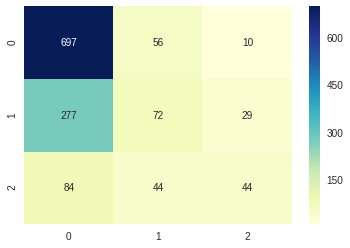

In [427]:
print ('Accuracy:', accuracy_score(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")